In [1]:
import numpy as np
import matplotlib.pyplot as plt

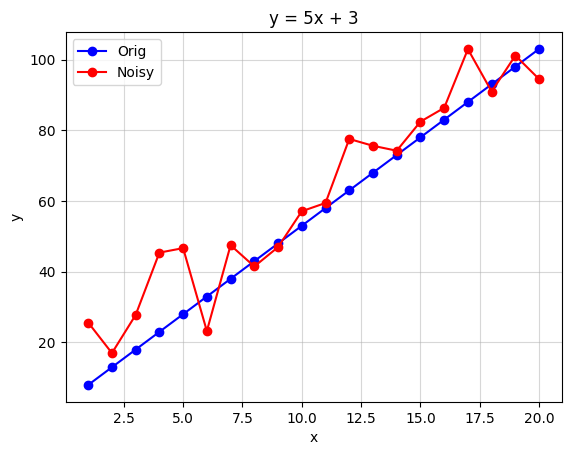

In [4]:
np.random.seed(0)
n = 20
x = np.linspace(1, 20, n)
y =5 * x + 3
y_dash = 5 * x + 3 + np.random.normal(0, 10, n)
plt.plot(x, y, 'bo-', label = "Orig")
plt.plot(x, y_dash, 'ro-', label = "Noisy")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 5x + 3')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

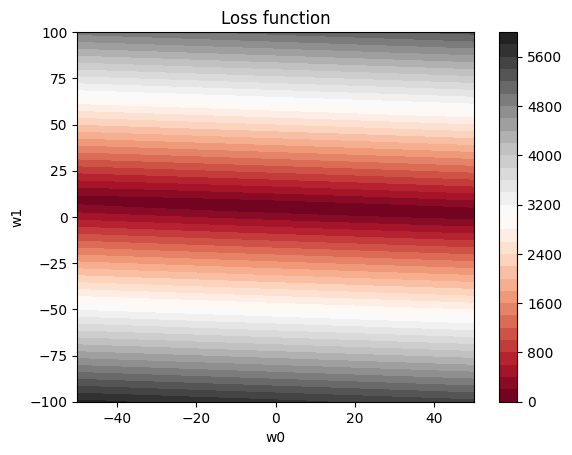

In [5]:
# Create a meshgrid of w0 and w1
w0_list = np.linspace(-50, 50, 100)
w1_list = np.linspace(-100, 100, 100)
W0, W1 = np.meshgrid(w0_list, w1_list)
err = np.linalg.norm(y_dash - y)

# Calculate the loss for each pair of w0 and w1
losses = np.zeros_like(W0)
for i in range(len(w0_list)):
    for j in range(len(w1_list)):
        w0 = w0_list[i]
        w1 = w1_list[j]
        y_pred = w0 + w1 * x
        losses[j, i] = np.linalg.norm(y_dash - y_pred)


# plot a counter plot of loss function
plt.figure()
plt.contourf(W0, W1, losses, 30, cmap = 'RdGy')
plt.colorbar()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Loss function')
plt.show()

# # plot a counour plot
# plt.figure()
# plt.contourf([w0_list, w1_list], losses, 30, cmap = 'RdGy')
# plt.colorbar()
# plt.xlabel('w0')
# plt.ylabel('w1')
# plt.title('Loss function')
# plt.show()

In [6]:
print(err)

45.759210500611786


In [7]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x.reshape(-1, 1), y_dash)

print(model1.intercept_, model1.coef_)
print(np.linalg.norm(model1.intercept_ + model1.coef_ * x - y_dash))

14.978015129118646 [4.40146008]
34.74745042954675


In [8]:
from gurobi_optimods.regression import LADRegression
model2 = LADRegression()
model2.fit(x.reshape(-1, 1), y_dash)
print(model2.intercept_, model2.coef_)
print(np.linalg.norm(model2.intercept_ + model2.coef_ * x - y_dash))

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22621.2))

CPU model: AMD Ryzen 5 5500U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 20 rows, 42 columns and 80 nonzeros
Model fingerprint: 0xace0c0f3
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 1e+02]
Presolve time: 0.02s
Presolved: 20 rows, 42 columns, 80 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      22    1.2255445e+02   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.225544543e+02
14.275988279668486 [4.50379719]
34.88731997933392


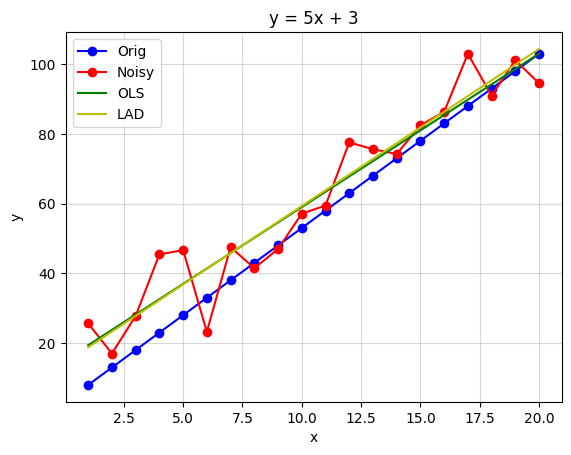

In [9]:
plt.plot(x, y, 'bo-', label = "Orig")
plt.plot(x, y_dash, 'ro-', label = "Noisy")
plt.plot(x, model1.intercept_ + model1.coef_ * x, 'g-', label = "OLS")
plt.plot(x, model2.intercept_ + model2.coef_ * x, 'y-', label = "LAD")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 5x + 3')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

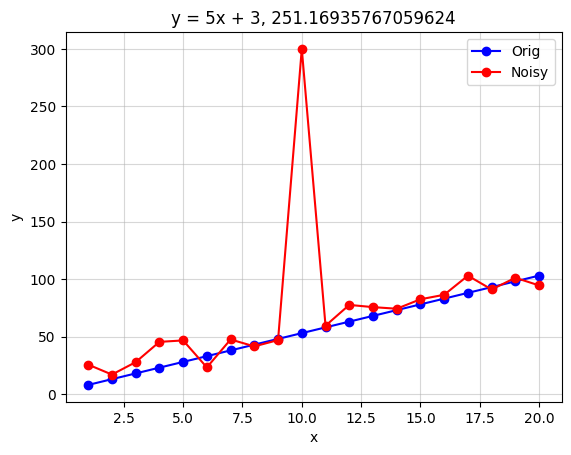

In [10]:
## Add outlier

y_ddash = y_dash.copy()
y_ddash[9] = 300 
err = np.linalg.norm(y_ddash - y)
plt.plot(x, y, 'bo-', label = "Orig")
plt.plot(x, y_ddash, 'ro-', label = "Noisy")
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'y = 5x + 3, {err}')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

In [11]:
model3 = LinearRegression()
model3.fit(x.reshape(-1, 1), y_ddash)
print(model3.intercept_, model3.coef_)
print(np.linalg.norm(model3.intercept_ + model3.coef_ * x - y))

29.040300206943797 [4.218833]
82.27828231282938


In [12]:
model4 = LADRegression()
model4.fit(x.reshape(-1, 1), y_ddash)
print(model4.intercept_, model4.coef_)
print(np.linalg.norm(model4.intercept_ + model4.coef_ * x - y))

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22621.2))

CPU model: AMD Ryzen 5 5500U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 20 rows, 42 columns and 80 nonzeros
Model fingerprint: 0x3cb66dbd
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+02]
Presolve time: 0.01s
Presolved: 20 rows, 42 columns, 80 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      21    3.6027771e+02   0.000000e+00   0.000000e+00      0s

Solved in 21 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.602777121e+02
17.295215987543944 [4.31509546]
36.34836903310606


In [13]:
from sklearn.linear_model import HuberRegressor
model5 = HuberRegressor(fit_intercept=False)
model5.fit(x.reshape(-1, 1), y_ddash)
print(model5.intercept_, model5.coef_)
print(np.linalg.norm(model5.intercept_ + model5.coef_ * x - y))

0.0 [5.52553336]
17.620437251564564


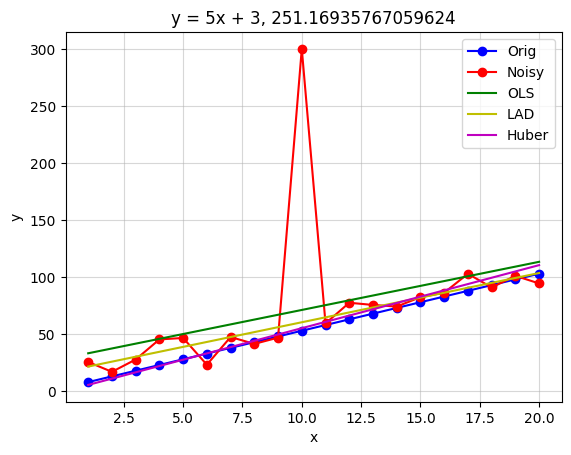

In [14]:
plt.plot(x, y, 'bo-', label = "Orig")
plt.plot(x, y_ddash, 'ro-', label = "Noisy")
plt.plot(x, model3.intercept_ + model3.coef_ * x, 'g-', label = "OLS")
plt.plot(x, model4.intercept_ + model4.coef_ * x, 'y-', label = "LAD")
plt.plot(x, model5.intercept_ + model5.coef_ * x, 'm-', label = "Huber")
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'y = 5x + 3, {err}')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

In [8]:
from tqdm import tqdm
from scipy.optimize import linprog

In [7]:
def LP_solve(X, y, w):
    """
    Solve the L1 norm optimization problem using linear programming
    ## Inputs
    X: numpy.array
        Input matrix
    y: numpy.array
        Target vector
    w: numpy.array
        Weight vector
    ---
    ## Outputs
    result: numpy.array
        Solution vector
    """
    n, k = X.shape
    c = np.concatenate([w, w, np.zeros(shape = k)])
    A_eq = np.block([np.eye(n), -np.eye(n), X])
    b_eq = y
    bounds = [(0, None)]*n + [(0, None)]*n + [(None, None)]*k ########## NEEDS ATTENTION  -np.max(np.max(X, axis = 1), axis = 0)*bound_multiplier
    result = linprog(c, A_eq = A_eq, b_eq = b_eq, bounds = bounds)
    if result.status != 0:
        # print(result.status, result.message)
        return None
    else:
        return result.x[-k:]

In [3]:
def AltConvPro_LP(M, rank, iterations: int = 30, tol: float = 1e-5, sigma:float = 6):
    """
    Alternating Convex Programming for matrix decomposition such that M = UV' under L1 Norm.
    ## Inputs
    M: numpy.array
        Input matrix
    rank: int
        Rank of the decomposition
    ---
    ## Outputs
    (U, V): (numpy.array, numpy.array)
        Decomposed matrices
    """

    # Initialization
    U = np.eye(M.shape[0], rank)
    S = np.eye(rank)
    V = np.zeros((M.shape[1], rank))
    W = np.ones((M.shape[0], M.shape[1]))
    losses = []
    for iter in tqdm(range(iterations)):
        # print(iter)
        # Update V
        for j in range(M.shape[1]):
            temp = LP_solve(U @ S, M[:, j], W[:, j])
            if temp is not None:
                V[j, :] = temp
        # Update U
        for j in range(M.shape[0]):
            temp = LP_solve(V @ S.T, M[j, :], W[j, :])
            if temp is not None:
                U[j, :] = temp
        # Normalization
        Nv = np.diag(V.T @ V)
        Nu = np.diag(U.T @ U)
        V = V @ np.diag(1/Nv)
        U = U @ np.diag(1/Nu)
        S = np.diag(Nu) @ S @ np.diag(Nv)
        W = np.exp(-(M - U @ S @ V.T)**2/(2*sigma**2))
        W = W/np.sum(np.sum(W, axis = 1), axis = 0)
        losses.append(np.linalg.norm((M - (U @ S @ V.T)).reshape(-1, 1), ord = 1)/np.linalg.norm(M.reshape(-1, 1), ord = 1))
        if iter == 0:
            consecutive_loss = losses[-1]
        else:
            consecutive_loss = abs(losses[-1] - losses[-2])
            if consecutive_loss < tol:
                break
        # if iter == 0:
        #     U_old = U
        #     V_old = V
        # else:
        #     if iter == 1:
        #         simU = np.diag(U.T @ U_old)/(np.linalg.norm(U, axis = 0)*np.linalg.norm(U_old, axis = 0))
        #         simV = np.diag(V.T @ V_old)/(np.linalg.norm(V, axis = 0)*np.linalg.norm(V_old, axis = 0))
        #     if all(simU > np.ones(len(simU)) - tol) and all(simV > np.ones(len(simV)) - tol):
        #         break
    return U @ S**(0.5), V @ S**(0.5), losses, W

In [2]:
def AltConvPro_LP_old(M, rank, iterations: int = 30, tol: float = 1e-5, sigma:float = 6):
    """
    Alternating Convex Programming for matrix decomposition such that M = UV' under L1 Norm.
    ## Inputs
    M: numpy.array
        Input matrix
    rank: int
        Rank of the decomposition
    ---
    ## Outputs
    (U, V): (numpy.array, numpy.array)
        Decomposed matrices
    """

    # Initialization
    U = np.eye(M.shape[0], rank)
    S = np.eye(rank)
    V = np.zeros((M.shape[1], rank))
    W = np.ones((M.shape[0], M.shape[1]))
    losses = []
    for iter in tqdm(range(iterations)):
        # print(iter)
        # Update V
        for j in range(M.shape[1]):
            temp = LP_solve(U @ S, M[:, j], W[:, j])
            if temp is not None:
                V[j, :] = temp
        # Update U
        for j in range(M.shape[0]):
            temp = LP_solve(V @ S.T, M[j, :], W[j, :])
            if temp is not None:
                U[j, :] = temp
        # Normalization
        Nv = np.diag(V.T @ V)
        Nu = np.diag(U.T @ U)
        V = V @ np.diag(1/Nv)
        U = U @ np.diag(1/Nu)
        S = np.diag(Nu) @ S @ np.diag(Nv)
        # W = np.exp(-(M - U @ S @ V.T)**2/(2*sigma**2))
        # W = W/np.sum(np.sum(W, axis = 1), axis = 0)
        losses.append(np.linalg.norm(M.reshape(-1, 1) - (U @ S @ V.T).reshape(-1, 1), ord = 1)/np.linalg.norm(M.reshape(-1, 1), ord = 1))
        if iter == 0:
            consecutive_loss = losses[-1]
        else:
            consecutive_loss = abs(losses[-1] - losses[-2])
            if consecutive_loss < tol:
                break
        # if iter == 0:
        #     U_old = U
        #     V_old = V
        # else:
        #     if iter == 1:
        #         simU = np.diag(U.T @ U_old)/(np.linalg.norm(U, axis = 0)*np.linalg.norm(U_old, axis = 0))
        #         simV = np.diag(V.T @ V_old)/(np.linalg.norm(V, axis = 0)*np.linalg.norm(V_old, axis = 0))
        #     if all(simU > np.ones(len(simU)) - tol) and all(simV > np.ones(len(simV)) - tol):
        #         break
    return U @ S**(0.5), V @ S**(0.5), losses, W

In [55]:
def AltConvPro_LP_Huber(M, rank, iterations: int = 30, tol: float = 1e-5, epsilon:float = 1.35):
    """
    Alternating Convex Programming for matrix decomposition such that M = UV' under L1 Norm.
    ## Inputs
    M: numpy.array
        Input matrix
    rank: int
        Rank of the decomposition
    ---
    ## Outputs
    (U, V): (numpy.array, numpy.array)
        Decomposed matrices
    """

    # Initialization
    U = np.eye(M.shape[0], rank)
    S = np.eye(rank)
    V = np.zeros((M.shape[1], rank))
    W = np.ones((M.shape[0], M.shape[1]))
    losses = []
    for iter in tqdm(range(iterations)):
        # print(iter)
        # Update V
        for j in range(M.shape[1]):
            model = HuberRegressor(epsilon=epsilon, fit_intercept=False)
            V[j, :] = model.fit(U @ S, M[:, j]).coef_
        # Update U
        for j in range(M.shape[0]):
            model = HuberRegressor(epsilon=epsilon, fit_intercept=False)
            U[j, :] = model.fit(V @ S.T, M[j, :]).coef_
        # Normalization
        Nv = np.diag(V.T @ V)
        Nu = np.diag(U.T @ U)
        V = V @ np.diag(1/Nv)
        U = U @ np.diag(1/Nu)
        S = np.diag(Nu) @ S @ np.diag(Nv)
        # W = np.exp(-(M - U @ S @ V.T)**2/(2*sigma**2))
        # W = W/np.sum(np.sum(W, axis = 1), axis = 0)
        losses.append(np.linalg.norm(M.reshape(-1, 1) - (U @ S @ V.T).reshape(-1, 1), ord = 1)/np.linalg.norm(M.reshape(-1, 1), ord = 1))
        if iter == 0:
            consecutive_loss = losses[-1]
        else:
            consecutive_loss = abs(losses[-1] - losses[-2])
            if consecutive_loss < tol:
                break
        # if iter == 0:
        #     U_old = U
        #     V_old = V
        # else:
        #     if iter == 1:
        #         simU = np.diag(U.T @ U_old)/(np.linalg.norm(U, axis = 0)*np.linalg.norm(U_old, axis = 0))
        #         simV = np.diag(V.T @ V_old)/(np.linalg.norm(V, axis = 0)*np.linalg.norm(V_old, axis = 0))
        #     if all(simU > np.ones(len(simU)) - tol) and all(simV > np.ones(len(simV)) - tol):
        #         break
    return U @ S**(0.5), V @ S**(0.5), losses, W

In [5]:
from tqdm import tqdm 

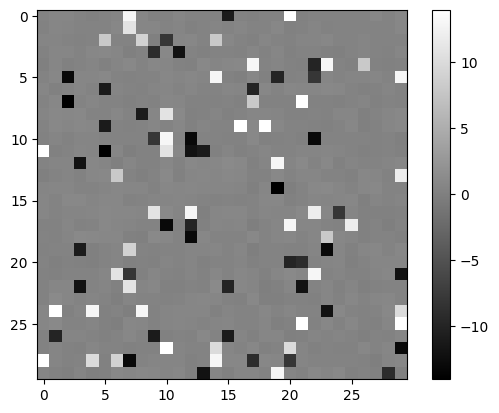

 27%|██▋       | 8/30 [00:01<00:04,  5.21it/s]


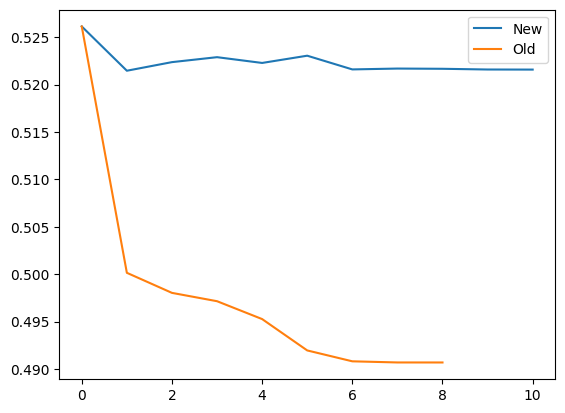

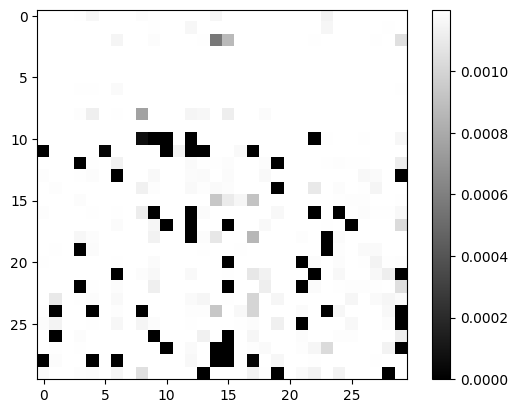

In [17]:
size = (30, 30)
M = np.random.rand(30, 30)
A, B, C = np.linalg.svd(M, full_matrices = False)
rank = 10
M = A[:, :rank] @ np.diag(B[:rank]) @ C[:rank, :]
M_dash = M.copy()
np.random.seed(2)
num_out = 90
indices = np.random.choice(np.arange(size[0]*size[1]), num_out, replace = False)
for i in range(num_out):
    M_dash[indices[i]//size[1], indices[i]%size[1]] = np.random.randint(8, 15) * np.random.choice([-1, 1])
plt.imshow(M_dash, cmap = 'gray')
plt.colorbar()
plt.show()

U, V, losses, W = AltConvPro_LP(M_dash, rank, sigma = 2)
U_dash, V_dash, losses_dash, W_dash = AltConvPro_LP_old(M_dash, rank)
# U_h, V_h, losses_h, W_h = AltConvPro_LP_Huber(M_dash, rank, epsilon = 1.25)
plt.plot(losses, label = 'New')
plt.plot(losses_dash, label = 'Old')
# plt.plot(losses_h, label = 'Huber')
plt.legend()
plt.show()
plt.imshow(W, cmap = 'gray')
plt.colorbar()
plt.show()

In [18]:
print("Old")
print(np.linalg.norm((W * (M - (U_dash @ V_dash.T))).reshape(-1, 1), ord = 1))
print(np.linalg.norm((M - (U_dash @ V_dash.T)).reshape(-1, 1), ord = 1))

print("New")
print(np.linalg.norm((W * (M - (U @ V.T))).reshape(-1, 1), ord = 1))
print(np.linalg.norm((M - (U @ V.T)).reshape(-1, 1), ord = 1))

# print("Huber")
# print(np.linalg.norm((W * (M - (U_h @ V_h.T))).reshape(-1, 1), ord = 1))
# print(np.linalg.norm((M - (U_h @ V_h.T)).reshape(-1, 1), ord = 1))

X, Y, Z = np.linalg.svd(M_dash, full_matrices = False)
print("SVD")
print(np.linalg.norm((W * (M- X[:, :rank] @ np.diag(Y[:rank]) @ Z[:rank, :])).reshape(-1, 1), ord = 1))
print(np.linalg.norm((M - X[:, :rank] @ np.diag(Y[:rank]) @ Z[:rank, :]).reshape(-1, 1), ord = 1))

Old
0.6349338604042053
662.8143496175596
New
0.5883422714732347
587.8207144693157
SVD
1.307806258888352
1611.9979627631687


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [251]:
def procrustes_closest_matrix(matrix):
    U, S, V = np.linalg.svd(matrix, full_matrices=False)
    return U @ V.T

def L1_PC_Joint(X, K, iterations: int = 20):
    """Iterative Alternating Algorithm for L1 Norm Principal Component Analysis"""
    # Parameters
    D, N = X.shape
    Q = np.random.randn(D, K)

    B = np.random.choice([-1, 1], size=(N, K))
    for _ in range(iterations):
        B = np.sign(X.T @ Q)
        Q = procrustes_closest_matrix(X @ B)

    return Q, B

def find_q_opt(X, iterations: int = 20):
    D, N = X.shape
    previous_b = np.random.choice([-1, 1], size=N)
    XTX = X.T @ X
    b_opt = np.sign(XTX @ previous_b)
    iter = 0
    while not np.array_equal(b_opt, previous_b) and iter < iterations:
        previous_b = b_opt.copy()
        b_opt = np.sign(XTX @ previous_b)
        iter += 1
    q_opt = (X @ b_opt)/np.linalg.norm(X @ b_opt)
    return q_opt


def L1_PC_Greedy(X, K, iterations: int = 20):
    """Greedy Alternating Algorithm for L1 Norm Principal Component Analysis"""
    # Parameters
    D, N = X.shape
    Q = np.zeros((D, K))
    for i in range(K):
        X_dash = (np.eye(D) - Q @ Q.T) @ X
        Q[:, i] = find_q_opt(X_dash, iterations)
    return Q



def L1_cSVD(X, K, max_iterations=100, tol=1e-5, greedy=False):

    D, N = X.shape
    if greedy:
        U = L1_PC_Greedy(X, K, iterations=max_iterations)
    else:
        U = L1_PC_Joint(X, K, iterations=max_iterations)[0]
    A = X.T @ U
    S = np.zeros((K, K))
    V = np.linalg.qr(np.random.randn(N, K))[0]
    
    converged = False
    iteration = 0

    while not converged and iteration < max_iterations:
        iteration += 1
        previous_S = S.copy()

        for i in range(K):
            s_list = []
            M = []
            for j in range(N):
                s = A[j, i]/V[j, i]
                s_list.append(s)
                M.append(np.linalg.norm(A[:, i] - s * V[:, i], ord = 1))
            j_opt = np.argmin(M)
            S[i, i] = s_list[j_opt]
        

        U_prime, S_prime, V_prime = np.linalg.svd(A @ (1/(S+1e-6)), full_matrices=False)
        V = U_prime @ V_prime.T

        if np.linalg.norm(S - previous_S, ord='fro') < tol:
            converged = True

    return U, S, V

In [ ]:
np.random.seed(1)
M = np.random.randint(-5, 5, (40, 25))
u, s, v = np.linalg.svd(M, full_matrices=False)
M_dash = u[:, :10] @ np.diag(s[:10]) @ v[:10, :]
M_dash[np.random.choice(40, 10), np.random.choice(25, 10)] = np.random.choice([-100, 100], 10)
K = 10
U, S, V = L1_cSVD(M_dash, K, max_iterations=30, tol=1e-7, greedy=True)

In [329]:
U.shape, S.shape, V.shape

((40, 10), (10, 10), (25, 10))

In [330]:
np.linalg.norm(M - (U @ S @ V.T), ord = 1) / np.linalg.norm(M, ord = 1)

1.8216308591136985

[[-0.99992058 -0.01260301 -0.        ]
 [-0.01260301  0.99992058  0.        ]]
[[-0.99990879  0.01350628  0.        ]
 [-0.01350628 -0.99990879  0.        ]]


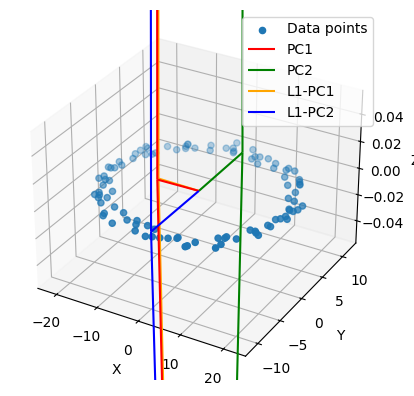

In [319]:
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Generate random points on an ellipse
np.random.seed(0)
theta = np.linspace(0, 2 * np.pi, 100)
a, b = 20, 10  # semi-major and semi-minor axes
x = a * np.cos(theta) + np.random.normal(0, 1, 100)
y = b * np.sin(theta) + np.random.normal(0, 1, 100)
z = np.zeros(100)

# Stack the points into a single array
data = np.vstack((x, y, z)).T

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data)
components = pca.components_

Q = L1_PC_Greedy(data.T, 2, 20)
print(components)
print(Q.T)

# Plot the ellipse and the principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label='Data points')

# Plot the principal components
mean = np.mean(data, axis=0)
for i, component in enumerate(components):
    ax.quiver(mean[0], mean[1], 0, component[0], component[1], 0, 
              length=10, color=['r', 'g', 'b'][i], label=f'PC{i+1}')

for i, component in enumerate(Q.T):
    ax.quiver(mean[0], mean[1], 0, component[0], component[1], 0, 
              length=10, color=['orange', 'blue'][i], label=f'L1-PC{i+1}') 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()